In [12]:
DATA_DIR = '/home/data'
train_file = f'{DATA_DIR}/train.csv'
test_file = f'{DATA_DIR}/test.csv'



In [13]:
import pandas as pd
import numpy as np
train = pd.read_csv(train_file, delimiter=',')
train['label']='train'
train.out_id = train.out_id.astype('str')

test = pd.read_csv(test_file, delimiter=',')
test['label']='test'
test.out_id = test.out_id.astype('str')


train.head()
all = pd.concat([train, test])


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [16]:
print(min(all.end_lat.min(), all.start_lat.min() ))
print(max(all.end_lat.max(), all.start_lat.max() ))

18.22155
49.746388


In [17]:
print(min(all.end_lon.min(), all.start_lon.min() ))
print(max(all.end_lon.max(), all.start_lon.max() ))

75.029203
134.753464


In [35]:
train.iterrows?

In [41]:
for index, sample in train[:2].iterrows():
    print( sample.start_time)

2018-01-20 10:13:43
2018-02-12 17:40:51


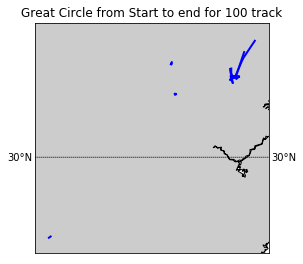

In [47]:
sample = train[:100]

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.

#Lon
#75.029203
#134.753464
#lat
#18.22155
#49.746388
llcrnrlon = min(sample.start_lon.min(), sample.end_lon.min()) -1
urcrnrlon = max(sample.start_lon.max(), sample.end_lon.max()) +1

llcrnrlat = min(sample.start_lat.min(), sample.end_lat.min()) -1
urcrnrlat = max(sample.start_lat.max(), sample.end_lat.max()) +1
              
m = Basemap(llcrnrlon = llcrnrlon, llcrnrlat = llcrnrlat, urcrnrlon = urcrnrlon, urcrnrlat = urcrnrlat,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
for _, item in sample.iterrows():
    # nylat, nylon are lat/lon of New York
    start_lat = item.start_lat  ; start_lon = item.start_lon 
    # lonlat, lonlon are lat/lon of London.
    end_lat = item.end_lat  ; end_lon = item.end_lon 
    # draw great circle route between NY and London
    m.drawgreatcircle(start_lon,start_lat,end_lon,end_lat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title(f'Great Circle from Start to end for {len(sample)} track')
plt.show()

In [67]:
train[train.out_id=='861661609028001']

,r_key,out_id,start_time,end_time,start_lat,start_lon,end_lat,end_lon,label


In [70]:
all.iloc[68511:68515,:]

all.out_id = all.out_id.astype('str')
all[all.out_id=='861661609028001']

,end_lat,end_lon,end_time,label,out_id,r_key,start_lat,start_lon,start_time
68255,35.419929,117.029652,2018-01-01 07:24:30,train,861661609028001,SDK-XJ_be98cd589355c72379358190937e914b,35.410934,116.994342,2018-01-01 07:18:08
68256,35.410180,116.993745,2018-01-02 07:54:53,train,861661609028001,SDK-XJ_bfdc429ce7c7358e2b91e384db059bcf,35.419850,117.029350,2018-01-02 07:47:19
68257,35.419979,117.029630,2018-01-03 07:29:00,train,861661609028001,SDK-XJ_3ec6957b58e028d15b631306e2ce33de,35.411008,116.994592,2018-01-03 07:22:41
68258,35.410228,116.993825,2018-01-03 10:31:52,train,861661609028001,SDK-XJ_782121d3f4c75b4cbedbc4966737705c,35.419843,117.029383,2018-01-03 10:07:06
68259,35.420009,117.029612,2018-01-03 11:29:15,train,861661609028001,SDK-XJ_5ba519744652aa2a619f2c52979d9094,35.410955,116.994441,2018-01-03 11:23:15
68260,35.410188,116.994033,2018-01-04 08:16:12,train,861661609028001,SDK-XJ_9bf0d462972c199fd12ee55fe71c97ab,35.419775,117.028772,2018-01-04 08:05:50
68261,35.419972,117.029628,2018-01-05 07:39:36,train,861661609028001,SDK-XJ_8d4cffc779a1cc301d903e56cb56494a,35.411043,116.994602,2018-01-05 07:29:17
68262,35.410216,116.993829,2018-01-05 14:16:58,train,861661609028001,SDK-XJ_b8e5a9e5a17c47b80f4cf69d0dd95614,35.419498,117.029470,2018-01-05 14:08:58
68263,35.423604,117.017850,2018-01-05 15:16:07,train,861661609028001,SDK-XJ_bf24d3a77bfbc75b35b146dd845ab434,35.411169,116.995165,2018-01-05 15:09:40
68264,35.420042,117.029486,2018-01-05 16:22:38,train,861661609028001,SDK-XJ_331920859d90df9f7c04966ef41a7b20,35.422970,117.018357,2018-01-05 16:16:40


In [12]:
len(train.groupby('out_id').nunique())

5819

In [14]:
train.shape

(1448321, 8)

In [15]:
test = pd.read_csv(test_file)
print(test.shape)
test.head()

(47493, 5)


,r_key,out_id,start_time,start_lat,start_lon
0,SDK-XJ_212b1190d5924bc6225557f1105b2b21,861661609023051,2018-07-03 07:15:44,34.873591,117.573400
1,SDK-XJ_1acf33d4e624fc5b0ff259c23743de0f,861661609023051,2018-07-05 18:29:20,34.846818,117.565654
2,SDK-XJ_5866d63b8453b2dd0c7353c0ad22989d,861661609023051,2018-07-07 08:32:11,34.873579,117.573436
3,SDK-XJ_e670157d7b0eaeb7ee11ae7b953e9a2e,861661609023051,2018-07-09 07:11:09,34.873735,117.573475
4,SDK-XJ_aef2eed237cd4a22b1fc7ffcc2b214aa,861661609023051,2018-07-11 18:21:28,34.846793,117.565553


In [75]:
car_test = test.out_id.drop_duplicates().to_frame()
car_test.head()

len(car_train[car_test.out_id.isin(train.out_id.drop_duplicates())])

5734

In [22]:
train.dtypes

r_key          object
out_id         object
start_time     object
end_time       object
start_lat     float64
start_lon     float64
end_lat       float64
end_lon       float64
dtype: object

In [23]:
test.dtypes

r_key          object
out_id         object
start_time     object
start_lat     float64
start_lon     float64
dtype: object

In [33]:
all = pd.concat([train, test])
gp = all.groupby('out_id')['r_key'].count().to_frame().reset_index()
gp.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,out_id,r_key
0,861661609024711,74
1,861661609025231,114
2,861661609025311,366
3,861661609025531,265
4,861661609025711,166


In [37]:
gp.out_id = gp.out_id.astype('str')
gp.dtypes

out_id    object
r_key      int64
dtype: object

In [45]:
all.groupby('out_id')



,out_id
47490,CT910M01E2AA08GG00270
47489,CT910M01E2AA05GG00114
47487,998851710001531
47483,998851710001471
47477,998851710000231


In [77]:
!pip install mpl_toolkits

  Could not find a version that satisfies the requirement mpl_toolkits (from versions: )
No matching distribution found for mpl_toolkits
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install basemap

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import os
os.environ['PROJ_LIB'] = '/Users/lali2/dev/python/anaconda3/share/proj'

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.etopo()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '~/proj_lib/epsg'

In [4]:
!mkdir ~/proj_lib

In [79]:
!which python

/opt/conda/bin/python


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


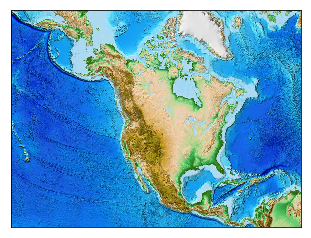

In [7]:
#https://matplotlib.org/basemap/users/examples.html

import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj' #epsg

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.etopo()
plt.show()